In [1]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler



In [2]:
import numpy as np

In [3]:
import h5py

In [4]:
scaler = StandardScaler()

In [5]:
df = pd.read_csv('full.csv')
y = df['HeartDisease']
X = df.drop(['HeartDisease'], axis = 1)


In [6]:
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [8]:
y_train.shape

(642,)

In [9]:
X_train.shape

(642, 16)

In [10]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [11]:
print(y_test.shape, y_train.shape)


(276, 1) (642, 1)


In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience  =25)
model_save = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

In [13]:
from tensorflow.keras.layers import BatchNormalization

In [59]:
def get_model(optimizer = 'adam', activation='relu'):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16,activation=activation, input_shape = (16,)))

    model.add(tf.keras.layers.Dense(8, activation=activation))

    model.add(tf.keras.layers.Dense(4, activation=activation))

    model.add(tf.keras.layers.Dense(4, activation=activation))

    model.add(tf.keras.layers.Dense(1,activation='tanh'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [29]:
from keras.wrappers.scikit_learn import KerasClassifier

In [60]:
model = KerasClassifier(build_fn=get_model, epochs=6, batch_size=16)

/var/folders/8s/s3hz2xx1783bt5rdg37f720m0000gn/T/ipykernel_41596/1082310420.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=get_model, epochs=6, batch_size=16)


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [61]:
kfold = cross_val_score(model, X,y,cv=5)

Epoch 1/6
 1/46 [..............................] - ETA: 13s - loss: 3.7404 - accuracy: 0.4375

2022-02-06 19:19:53.189015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 1s 8ms/step - loss: 1.6476 - accuracy: 0.6417
Epoch 2/6
46/46 [==============================] - 0s 6ms/step - loss: 0.8437 - accuracy: 0.7112
Epoch 3/6
46/46 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.7684
Epoch 4/6
46/46 [==============================] - 0s 5ms/step - loss: 0.5270 - accuracy: 0.7861
Epoch 5/6
46/46 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.7916
Epoch 6/6
12/12 [==============================] - 0s 6ms/step - loss: 0.4200 - accuracy: 0.8424


2022-02-06 19:19:54.918371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/46 [..............................] - ETA: 14s - loss: 1.6441 - accuracy: 0.5625

2022-02-06 19:19:55.242426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 1s 6ms/step - loss: 1.6184 - accuracy: 0.6362
Epoch 2/6
46/46 [==============================] - 0s 5ms/step - loss: 0.9000 - accuracy: 0.6921
Epoch 3/6
46/46 [==============================] - 0s 5ms/step - loss: 0.7474 - accuracy: 0.7262
Epoch 4/6
46/46 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.7629
Epoch 5/6
46/46 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.7875
Epoch 6/6
12/12 [==============================] - 0s 5ms/step - loss: 0.3265 - accuracy: 0.8859


2022-02-06 19:19:56.825696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/46 [..............................] - ETA: 14s - loss: 2.3158 - accuracy: 0.6250

2022-02-06 19:19:57.144560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 1s 7ms/step - loss: 1.4367 - accuracy: 0.6594
Epoch 2/6
46/46 [==============================] - 0s 5ms/step - loss: 0.7252 - accuracy: 0.7398
Epoch 3/6
46/46 [==============================] - 0s 5ms/step - loss: 0.6029 - accuracy: 0.7956
Epoch 4/6
46/46 [==============================] - 0s 5ms/step - loss: 0.5632 - accuracy: 0.8229
Epoch 5/6
46/46 [==============================] - 0s 5ms/step - loss: 0.5067 - accuracy: 0.8351
Epoch 6/6
12/12 [==============================] - 0s 5ms/step - loss: 0.7264 - accuracy: 0.7065


2022-02-06 19:19:58.758969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/46 [..............................] - ETA: 15s - loss: 3.5648 - accuracy: 0.4375

2022-02-06 19:19:59.093035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 1s 8ms/step - loss: 1.3250 - accuracy: 0.6571
Epoch 2/6
46/46 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.7619
Epoch 3/6
46/46 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.8136
Epoch 4/6
46/46 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.8340
Epoch 5/6
46/46 [==============================] - 0s 5ms/step - loss: 0.4485 - accuracy: 0.8340
Epoch 6/6
12/12 [==============================] - 0s 6ms/step - loss: 0.6537 - accuracy: 0.7377


2022-02-06 19:20:00.822759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/46 [..............................] - ETA: 28s - loss: 1.9574 - accuracy: 0.5000

2022-02-06 19:20:01.514891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 1s 6ms/step - loss: 1.6803 - accuracy: 0.6259
Epoch 2/6
46/46 [==============================] - 0s 4ms/step - loss: 0.9180 - accuracy: 0.7306
Epoch 3/6
46/46 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.7592
Epoch 4/6
46/46 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.7796
Epoch 5/6
46/46 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.8000
Epoch 6/6
12/12 [==============================] - 0s 5ms/step - loss: 1.5670 - accuracy: 0.7158


2022-02-06 19:20:03.018581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [40]:
kfold.mean()

0.8125089049339295

In [86]:
params = dict(optimizer=['sgd','adam'], epochs = [6], batch_size=[4,8,16], activation = ['relu', 'tanh'])
random_search = RandomizedSearchCV(model, param_distributions=params, cv=3)

In [87]:
random_results = random_search.fit(X,y)

Epoch 1/6


2022-02-06 19:31:20.899046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 2.5895 - accuracy: 0.6716
Epoch 2/6
77/77 [==============================] - 0s 4ms/step - loss: 1.8462 - accuracy: 0.6046
Epoch 3/6
77/77 [==============================] - 0s 4ms/step - loss: 0.7449 - accuracy: 0.7271
Epoch 4/6
77/77 [==============================] - 0s 4ms/step - loss: 0.5050 - accuracy: 0.7974
Epoch 5/6
77/77 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.8121
Epoch 6/6
27/39 [===================>..........] - ETA: 0s - loss: 3.2376 - accuracy: 0.4630

2022-02-06 19:31:23.235752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 2.9921 - accuracy: 0.4837
Epoch 1/6
 1/77 [..............................] - ETA: 21s - loss: 6.5392 - accuracy: 0.2500

2022-02-06 19:31:23.662612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 5ms/step - loss: 1.9750 - accuracy: 0.7467
Epoch 2/6
77/77 [==============================] - 0s 4ms/step - loss: 1.9435 - accuracy: 0.7141
Epoch 3/6
77/77 [==============================] - 0s 4ms/step - loss: 0.7793 - accuracy: 0.8284
Epoch 4/6
77/77 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.8578
Epoch 5/6
77/77 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.8676
Epoch 6/6
31/39 [======================>.......] - ETA: 0s - loss: 1.7276 - accuracy: 0.7540

2022-02-06 19:31:25.787566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 1.7154 - accuracy: 0.7549
Epoch 1/6
 1/77 [..............................] - ETA: 21s - loss: 4.4069 - accuracy: 0.3750

2022-02-06 19:31:26.183669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 5ms/step - loss: 1.1304 - accuracy: 0.8268
Epoch 2/6
77/77 [==============================] - 0s 4ms/step - loss: 0.7562 - accuracy: 0.8725
Epoch 3/6
77/77 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.8676
Epoch 4/6
77/77 [==============================] - 0s 4ms/step - loss: 0.6483 - accuracy: 0.8791
Epoch 5/6
77/77 [==============================] - 0s 4ms/step - loss: 0.6405 - accuracy: 0.8873
Epoch 6/6
30/39 [======================>.......] - ETA: 0s - loss: 0.9013 - accuracy: 0.7917

2022-02-06 19:31:28.420675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.8809 - accuracy: 0.7974
Epoch 1/6
 1/77 [..............................] - ETA: 24s - loss: 2.5380 - accuracy: 0.6250

2022-02-06 19:31:28.841381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 1.5221 - accuracy: 0.6634
Epoch 2/6
77/77 [==============================] - 0s 5ms/step - loss: 0.6819 - accuracy: 0.7451
Epoch 3/6
77/77 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.7778
Epoch 4/6
77/77 [==============================] - 0s 5ms/step - loss: 0.4993 - accuracy: 0.7827
Epoch 5/6
77/77 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.8072
Epoch 6/6
29/39 [=====================>........] - ETA: 0s - loss: 0.3839 - accuracy: 0.8448

2022-02-06 19:31:31.299342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8562
Epoch 1/6
 1/77 [..............................] - ETA: 45s - loss: 1.0738 - accuracy: 0.5000

2022-02-06 19:31:32.025456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 1.3229 - accuracy: 0.6732
Epoch 2/6
77/77 [==============================] - 0s 5ms/step - loss: 0.5751 - accuracy: 0.8023
Epoch 3/6
77/77 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.8431
Epoch 4/6
77/77 [==============================] - 0s 5ms/step - loss: 0.4042 - accuracy: 0.8415
Epoch 5/6
77/77 [==============================] - 0s 5ms/step - loss: 0.3694 - accuracy: 0.8578
Epoch 6/6
29/39 [=====================>........] - ETA: 0s - loss: 0.7507 - accuracy: 0.7457

2022-02-06 19:31:34.482662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.7526 - accuracy: 0.7647
Epoch 1/6
 1/77 [..............................] - ETA: 21s - loss: 0.7321 - accuracy: 0.7500

2022-02-06 19:31:34.874615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 5ms/step - loss: 1.2555 - accuracy: 0.7092
Epoch 2/6
77/77 [==============================] - 0s 5ms/step - loss: 0.6724 - accuracy: 0.8301
Epoch 3/6
77/77 [==============================] - 0s 4ms/step - loss: 0.6084 - accuracy: 0.8464
Epoch 4/6
77/77 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.8546
Epoch 5/6
77/77 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.8546
Epoch 6/6
34/39 [=========================>....] - ETA: 0s - loss: 1.4574 - accuracy: 0.7500

2022-02-06 19:31:37.243692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 3ms/step - loss: 1.3313 - accuracy: 0.7647
Epoch 1/6
 9/39 [=====>........................] - ETA: 0s - loss: 3.8262 - accuracy: 0.6042

2022-02-06 19:31:37.599083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 6ms/step - loss: 2.8753 - accuracy: 0.6781
Epoch 2/6
39/39 [==============================] - 0s 4ms/step - loss: 1.9112 - accuracy: 0.7451
Epoch 3/6
39/39 [==============================] - 0s 4ms/step - loss: 1.0805 - accuracy: 0.8088
Epoch 4/6
39/39 [==============================] - 0s 4ms/step - loss: 0.9780 - accuracy: 0.8186
Epoch 5/6
39/39 [==============================] - 0s 4ms/step - loss: 0.9505 - accuracy: 0.8350
Epoch 6/6
20/20 [==============================] - 0s 5ms/step - loss: 1.8779 - accuracy: 0.5098


2022-02-06 19:31:38.839155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 11s - loss: 3.6331 - accuracy: 0.3750

2022-02-06 19:31:39.197818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 6ms/step - loss: 1.9273 - accuracy: 0.7353
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 1.1026 - accuracy: 0.8170
Epoch 3/6
39/39 [==============================] - 0s 5ms/step - loss: 0.6687 - accuracy: 0.8448
Epoch 4/6
39/39 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.7876
Epoch 5/6
39/39 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.8252
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.7712


2022-02-06 19:31:40.570268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 11s - loss: 4.1168 - accuracy: 0.6250

2022-02-06 19:31:40.892374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 2.1600 - accuracy: 0.7222
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 1.2794 - accuracy: 0.8186
Epoch 3/6
39/39 [==============================] - 0s 4ms/step - loss: 1.0731 - accuracy: 0.8431
Epoch 4/6
39/39 [==============================] - 0s 4ms/step - loss: 0.8534 - accuracy: 0.8529
Epoch 5/6
39/39 [==============================] - 0s 4ms/step - loss: 0.7583 - accuracy: 0.8644
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 1.7651 - accuracy: 0.7451


2022-02-06 19:31:42.259549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
  1/153 [..............................] - ETA: 46s - loss: 4.3762 - accuracy: 0.5000

2022-02-06 19:31:42.596797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 4ms/step - loss: 1.4703 - accuracy: 0.6650
Epoch 2/6
153/153 [==============================] - 1s 4ms/step - loss: 0.6218 - accuracy: 0.7500
Epoch 3/6
153/153 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.7778
Epoch 4/6
153/153 [==============================] - 1s 4ms/step - loss: 0.5101 - accuracy: 0.7859
Epoch 5/6
153/153 [==============================] - 1s 4ms/step - loss: 0.4868 - accuracy: 0.8088
Epoch 6/6
32/77 [===========>..................] - ETA: 0s - loss: 0.5676 - accuracy: 0.7031

2022-02-06 19:31:46.190738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7418
Epoch 1/6
  8/153 [>.............................] - ETA: 1s - loss: 1.4580 - accuracy: 0.6875  

2022-02-06 19:31:46.967419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 4ms/step - loss: 1.0374 - accuracy: 0.7255
Epoch 2/6
153/153 [==============================] - 1s 4ms/step - loss: 0.3858 - accuracy: 0.8399
Epoch 3/6
153/153 [==============================] - 1s 4ms/step - loss: 0.3465 - accuracy: 0.8562
Epoch 4/6
153/153 [==============================] - 1s 4ms/step - loss: 0.3145 - accuracy: 0.8660
Epoch 5/6
153/153 [==============================] - 1s 3ms/step - loss: 0.2971 - accuracy: 0.8725
Epoch 6/6
32/77 [===========>..................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8359

2022-02-06 19:31:50.601578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step - loss: 0.7205 - accuracy: 0.7647
Epoch 1/6
 10/153 [>.............................] - ETA: 0s - loss: 3.0624 - accuracy: 0.4750 

2022-02-06 19:31:51.086395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 4ms/step - loss: 1.3115 - accuracy: 0.7876
Epoch 2/6
153/153 [==============================] - 1s 3ms/step - loss: 0.9299 - accuracy: 0.8480
Epoch 3/6
153/153 [==============================] - 1s 3ms/step - loss: 0.8369 - accuracy: 0.8644
Epoch 4/6
153/153 [==============================] - 1s 3ms/step - loss: 0.6685 - accuracy: 0.8676
Epoch 5/6
153/153 [==============================] - 1s 4ms/step - loss: 0.5260 - accuracy: 0.8595
Epoch 6/6
33/77 [===========>..................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7727

2022-02-06 19:31:54.558151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step - loss: 1.1358 - accuracy: 0.7712
Epoch 1/6
 10/153 [>.............................] - ETA: 0s - loss: 4.7150 - accuracy: 0.4500  

2022-02-06 19:31:55.015249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 4ms/step - loss: 1.8762 - accuracy: 0.7647
Epoch 2/6
153/153 [==============================] - 0s 3ms/step - loss: 0.9257 - accuracy: 0.8268
Epoch 3/6
153/153 [==============================] - 1s 3ms/step - loss: 0.8432 - accuracy: 0.8366
Epoch 4/6
153/153 [==============================] - 1s 4ms/step - loss: 0.6093 - accuracy: 0.8415
Epoch 5/6
153/153 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.8480
Epoch 6/6
29/77 [==========>...................] - ETA: 0s - loss: 0.4786 - accuracy: 0.7931

2022-02-06 19:31:58.368358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 4ms/step - loss: 0.4266 - accuracy: 0.8105
Epoch 1/6
 14/153 [=>............................] - ETA: 0s - loss: 3.0563 - accuracy: 0.6429 

2022-02-06 19:31:58.875792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 3ms/step - loss: 2.0212 - accuracy: 0.7729
Epoch 2/6
153/153 [==============================] - 1s 3ms/step - loss: 0.9535 - accuracy: 0.7990
Epoch 3/6
153/153 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8709
Epoch 4/6
153/153 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8807
Epoch 5/6
153/153 [==============================] - 1s 3ms/step - loss: 0.3019 - accuracy: 0.8791
Epoch 6/6
32/77 [===========>..................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8359

2022-02-06 19:32:02.062040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7843
Epoch 1/6
 11/153 [=>............................] - ETA: 0s - loss: 2.0804 - accuracy: 0.6136 

2022-02-06 19:32:02.538186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 4ms/step - loss: 1.1989 - accuracy: 0.8252
Epoch 2/6
153/153 [==============================] - 1s 4ms/step - loss: 0.8404 - accuracy: 0.8693
Epoch 3/6
153/153 [==============================] - 1s 4ms/step - loss: 0.7159 - accuracy: 0.8775
Epoch 4/6
153/153 [==============================] - 1s 3ms/step - loss: 0.6566 - accuracy: 0.8807
Epoch 5/6
153/153 [==============================] - 1s 4ms/step - loss: 0.6417 - accuracy: 0.8840
Epoch 6/6
28/77 [=========>....................] - ETA: 0s - loss: 1.0456 - accuracy: 0.7857

2022-02-06 19:32:06.062588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 4ms/step - loss: 1.3494 - accuracy: 0.8105
Epoch 1/6


2022-02-06 19:32:06.619733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 1.7762 - accuracy: 0.6046
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 1.0567 - accuracy: 0.6569
Epoch 3/6
39/39 [==============================] - 0s 5ms/step - loss: 0.7780 - accuracy: 0.6879
Epoch 4/6
39/39 [==============================] - 0s 5ms/step - loss: 0.7146 - accuracy: 0.7059
Epoch 5/6
39/39 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.7075
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.7026


2022-02-06 19:32:08.072174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 12s - loss: 2.4818 - accuracy: 0.5000

2022-02-06 19:32:08.425321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 6ms/step - loss: 1.5320 - accuracy: 0.6487
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 0.8124 - accuracy: 0.7435
Epoch 3/6
39/39 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.8137
Epoch 4/6
39/39 [==============================] - 0s 5ms/step - loss: 0.5115 - accuracy: 0.8431
Epoch 5/6
39/39 [==============================] - 0s 5ms/step - loss: 0.4882 - accuracy: 0.8497
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 0.7086 - accuracy: 0.7614


2022-02-06 19:32:09.884847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 23s - loss: 2.3582 - accuracy: 0.6250

2022-02-06 19:32:10.553000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 8ms/step - loss: 1.5316 - accuracy: 0.6650
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 0.9126 - accuracy: 0.7810
Epoch 3/6
39/39 [==============================] - 0s 5ms/step - loss: 0.6447 - accuracy: 0.8301
Epoch 4/6
39/39 [==============================] - 0s 5ms/step - loss: 0.5405 - accuracy: 0.8464
Epoch 5/6
39/39 [==============================] - 0s 5ms/step - loss: 0.5182 - accuracy: 0.8497
Epoch 6/6
20/20 [==============================] - 0s 5ms/step - loss: 1.2158 - accuracy: 0.7255


2022-02-06 19:32:12.101064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/77 [..............................] - ETA: 24s - loss: 3.9488 - accuracy: 0.7500

2022-02-06 19:32:12.479839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 3.4914 - accuracy: 0.6307
Epoch 2/6
77/77 [==============================] - 0s 5ms/step - loss: 2.5805 - accuracy: 0.7124
Epoch 3/6
77/77 [==============================] - 0s 4ms/step - loss: 2.1812 - accuracy: 0.7239
Epoch 4/6
77/77 [==============================] - 0s 5ms/step - loss: 1.7821 - accuracy: 0.7549
Epoch 5/6
77/77 [==============================] - 0s 5ms/step - loss: 1.3414 - accuracy: 0.7843
Epoch 6/6
32/39 [=======================>......] - ETA: 0s - loss: 0.9750 - accuracy: 0.8828

2022-02-06 19:32:15.075231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.8490 - accuracy: 0.8889
Epoch 1/6
 1/77 [..............................] - ETA: 23s - loss: 4.7865 - accuracy: 0.3750

2022-02-06 19:32:15.490143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 2.6168 - accuracy: 0.6471
Epoch 2/6
77/77 [==============================] - 0s 5ms/step - loss: 1.9973 - accuracy: 0.7745
Epoch 3/6
77/77 [==============================] - 0s 5ms/step - loss: 1.7516 - accuracy: 0.8105
Epoch 4/6
77/77 [==============================] - 0s 5ms/step - loss: 1.4104 - accuracy: 0.8235
Epoch 5/6
77/77 [==============================] - 0s 5ms/step - loss: 1.0331 - accuracy: 0.8284
Epoch 6/6
33/39 [========================>.....] - ETA: 0s - loss: 0.8306 - accuracy: 0.8182

2022-02-06 19:32:18.177421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.8517 - accuracy: 0.8235
Epoch 1/6
 1/77 [..............................] - ETA: 23s - loss: 2.8480 - accuracy: 0.3750

2022-02-06 19:32:18.560011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 5ms/step - loss: 2.8328 - accuracy: 0.5997
Epoch 2/6
77/77 [==============================] - 0s 5ms/step - loss: 2.3658 - accuracy: 0.6618
Epoch 3/6
77/77 [==============================] - 0s 4ms/step - loss: 2.1063 - accuracy: 0.7124
Epoch 4/6
77/77 [==============================] - 0s 5ms/step - loss: 1.9499 - accuracy: 0.7533
Epoch 5/6
77/77 [==============================] - 0s 5ms/step - loss: 1.7341 - accuracy: 0.7794
Epoch 6/6
26/39 [===================>..........] - ETA: 0s - loss: 2.9512 - accuracy: 0.6923

2022-02-06 19:32:21.139809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 2.7749 - accuracy: 0.7026
Epoch 1/6
  1/153 [..............................] - ETA: 40s - loss: 4.1295 - accuracy: 0.5000

2022-02-06 19:32:21.546850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 3ms/step - loss: 0.8757 - accuracy: 0.7173
Epoch 2/6
153/153 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.8105
Epoch 3/6
153/153 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.8219
Epoch 4/6
153/153 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8350
Epoch 5/6
153/153 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8366
Epoch 6/6
32/77 [===========>..................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8672

2022-02-06 19:32:24.549020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8693
Epoch 1/6
  1/153 [..............................] - ETA: 41s - loss: 0.6120 - accuracy: 0.5000

2022-02-06 19:32:25.025182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 3ms/step - loss: 0.7008 - accuracy: 0.7729
Epoch 2/6
153/153 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.8137
Epoch 3/6
153/153 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8742
Epoch 4/6
153/153 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.8758
Epoch 5/6
153/153 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8873
Epoch 6/6
33/77 [===========>..................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8788

2022-02-06 19:32:28.010216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step - loss: 0.7891 - accuracy: 0.8105
Epoch 1/6
  1/153 [..............................] - ETA: 38s - loss: 0.3233 - accuracy: 0.7500

2022-02-06 19:32:28.477244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


153/153 [==============================] - 1s 3ms/step - loss: 0.9051 - accuracy: 0.8039
Epoch 2/6
153/153 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.8480
Epoch 3/6
153/153 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.8693
Epoch 4/6
153/153 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.8856
Epoch 5/6
153/153 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.8611
Epoch 6/6
33/77 [===========>..................] - ETA: 0s - loss: 0.5506 - accuracy: 0.8258

2022-02-06 19:32:31.376317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step - loss: 1.2133 - accuracy: 0.7908
Epoch 1/6
 1/39 [..............................] - ETA: 21s - loss: 7.1533 - accuracy: 0.3125

2022-02-06 19:32:32.158709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 3.6290 - accuracy: 0.5931
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 2.6008 - accuracy: 0.7124
Epoch 3/6
39/39 [==============================] - 0s 4ms/step - loss: 2.3784 - accuracy: 0.7124
Epoch 4/6
39/39 [==============================] - 0s 4ms/step - loss: 2.1912 - accuracy: 0.7239
Epoch 5/6
39/39 [==============================] - 0s 4ms/step - loss: 1.9277 - accuracy: 0.7402
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 1.0590 - accuracy: 0.8431


2022-02-06 19:32:33.513231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 11s - loss: 3.5884 - accuracy: 0.4375

2022-02-06 19:32:33.841150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 2.6979 - accuracy: 0.6340
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 2.1614 - accuracy: 0.7418
Epoch 3/6
39/39 [==============================] - 0s 4ms/step - loss: 1.8668 - accuracy: 0.7925
Epoch 4/6
39/39 [==============================] - 0s 5ms/step - loss: 1.6499 - accuracy: 0.8121
Epoch 5/6
39/39 [==============================] - 0s 5ms/step - loss: 1.4791 - accuracy: 0.8203
Epoch 6/6
20/20 [==============================] - 0s 5ms/step - loss: 1.6532 - accuracy: 0.7582


2022-02-06 19:32:35.216079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 11s - loss: 5.2556 - accuracy: 0.4375

2022-02-06 19:32:35.550636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 3.0307 - accuracy: 0.5654
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 2.5717 - accuracy: 0.6176
Epoch 3/6
39/39 [==============================] - 0s 5ms/step - loss: 2.0698 - accuracy: 0.7042
Epoch 4/6
39/39 [==============================] - 0s 4ms/step - loss: 1.8543 - accuracy: 0.7418
Epoch 5/6
39/39 [==============================] - 0s 5ms/step - loss: 1.7770 - accuracy: 0.7729
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 2.8900 - accuracy: 0.6797


2022-02-06 19:32:36.910305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 10s - loss: 2.4246 - accuracy: 0.6250

2022-02-06 19:32:37.219474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 0.9897 - accuracy: 0.6846
Epoch 2/6
39/39 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.7288
Epoch 3/6
39/39 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.7810
Epoch 4/6
39/39 [==============================] - 0s 4ms/step - loss: 0.4567 - accuracy: 0.7778
Epoch 5/6
39/39 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.7892
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 0.4266 - accuracy: 0.8366


2022-02-06 19:32:38.543366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 11s - loss: 2.5831 - accuracy: 0.5625

2022-02-06 19:32:38.859623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 6ms/step - loss: 0.8711 - accuracy: 0.6961
Epoch 2/6
39/39 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.8154
Epoch 3/6
39/39 [==============================] - 0s 5ms/step - loss: 0.4034 - accuracy: 0.8399
Epoch 4/6
39/39 [==============================] - 0s 5ms/step - loss: 0.3556 - accuracy: 0.8562
Epoch 5/6
39/39 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.8578
Epoch 6/6
20/20 [==============================] - 0s 4ms/step - loss: 0.7125 - accuracy: 0.7614


2022-02-06 19:32:40.235885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
 1/39 [..............................] - ETA: 10s - loss: 2.3223 - accuracy: 0.6250

2022-02-06 19:32:40.552331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 1.0689 - accuracy: 0.7288
Epoch 2/6
39/39 [==============================] - 0s 4ms/step - loss: 0.6498 - accuracy: 0.8154
Epoch 3/6
39/39 [==============================] - 0s 5ms/step - loss: 0.5189 - accuracy: 0.7843
Epoch 4/6
39/39 [==============================] - 0s 5ms/step - loss: 0.4584 - accuracy: 0.8627
Epoch 5/6
39/39 [==============================] - 0s 5ms/step - loss: 0.4020 - accuracy: 0.8676
Epoch 6/6
20/20 [==============================] - 0s 5ms/step - loss: 0.9788 - accuracy: 0.7647


2022-02-06 19:32:41.927884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/6
  1/230 [..............................] - ETA: 1:13 - loss: 1.7648 - accuracy: 0.2500

2022-02-06 19:32:42.286923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


101/230 [============>.................] - ETA: 0s - loss: 2.5289 - accuracy: 0.6584

KeyboardInterrupt: 

In [79]:
random_results.best_params_

{'optimizer': 'adam', 'epochs': 10, 'batch_size': 8, 'activation': 'relu'}

In [57]:
random_results.best_score_

0.8006535967191061

In [96]:
def get_model_for_nn(optimizer = 'adam', activation='relu', nl=1, nn=16):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16,activation=activation, input_shape = (16,)))
    for i in range(nl):
        model.add(tf.keras.layers.Dense(nn, activation=activation))

    model.add(tf.keras.layers.Dense(1,activation='tanh'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

model_nn = KerasClassifier(build_fn=get_model_for_nn, epochs=6, batch_size=16)

/var/folders/8s/s3hz2xx1783bt5rdg37f720m0000gn/T/ipykernel_41596/1954225511.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model_nn = KerasClassifier(build_fn=get_model_for_nn, epochs=6, batch_size=16)


In [97]:
params_nn=dict(epochs=[10],nl=[1,2,3,4,5], nn = [2,4,8,16,32],batch_size=[8])
params_nn

{'epochs': [10],
 'nl': [1, 2, 3, 4, 5],
 'nn': [2, 4, 8, 16, 32],
 'batch_size': [8]}

In [98]:
random_search_nn = RandomizedSearchCV(model_nn, param_distributions=params_nn, cv=3)

In [99]:
random_results_nn = random_search_nn.fit(X,y)

Epoch 1/10


2022-02-06 19:35:45.656742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 1.1253 - accuracy: 0.4690
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5425 - accuracy: 0.7304
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.7843
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4128 - accuracy: 0.8268
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8464
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.8676
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.8676
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3386 - accuracy: 0.8791
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.8791
Epoch 10/10
27/39 [===================>..........] - ETA: 0s - loss: 0.6051 - accuracy: 0.6528

2022-02-06 19:35:50.308565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.6961
Epoch 1/10


2022-02-06 19:35:50.785634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.7873 - accuracy: 0.6144
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4397 - accuracy: 0.8088
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3451 - accuracy: 0.8464
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.8742
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2606 - accuracy: 0.8824
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2360 - accuracy: 0.8922
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.9085
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2033 - accuracy: 0.9183
Epoch 9/10
77/77 [==============================] - 0s 6ms/step - loss: 0.1901 - accuracy: 0.9265
Epoch 10/10
11/39 [=======>......................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8977

2022-02-06 19:35:55.707488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.7481 - accuracy: 0.8235
Epoch 1/10


2022-02-06 19:35:56.217105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.7953 - accuracy: 0.6275
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4331 - accuracy: 0.8137
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.8497
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.8775
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3107 - accuracy: 0.8840
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.8807
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2777 - accuracy: 0.8905
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2688 - accuracy: 0.8954
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.9020
Epoch 10/10
12/39 [========>.....................] - ETA: 0s - loss: 0.4533 - accuracy: 0.7604

2022-02-06 19:36:00.896204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.8759 - accuracy: 0.7614
Epoch 1/10


2022-02-06 19:36:01.668755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.8404 - accuracy: 0.6552
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6104 - accuracy: 0.7402
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5326 - accuracy: 0.7663
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.7892
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4498 - accuracy: 0.7974
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4292 - accuracy: 0.8072
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4143 - accuracy: 0.8219
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3969 - accuracy: 0.8268
Epoch 9/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3852 - accuracy: 0.8268
Epoch 10/10
15/39 [==========>...................] - ETA: 0s - loss: 0.4647 - accuracy: 0.7750

2022-02-06 19:36:06.374040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.3948 - accuracy: 0.8105
Epoch 1/10


2022-02-06 19:36:06.851517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.8136 - accuracy: 0.6879
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5432 - accuracy: 0.7729
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4733 - accuracy: 0.8121
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4328 - accuracy: 0.8268
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4015 - accuracy: 0.8366
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.8562
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3647 - accuracy: 0.8611
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8676
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3394 - accuracy: 0.8676
Epoch 10/10
30/39 [======================>.......] - ETA: 0s - loss: 0.4951 - accuracy: 0.8083

2022-02-06 19:36:11.262447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.8105
Epoch 1/10


2022-02-06 19:36:11.721747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 0.6777 - accuracy: 0.7467
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.8284
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4108 - accuracy: 0.8415
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3867 - accuracy: 0.8546
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3666 - accuracy: 0.8611
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3468 - accuracy: 0.8676
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3387 - accuracy: 0.8725
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3341 - accuracy: 0.8742
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3280 - accuracy: 0.8791
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.5598 - accuracy: 0.7115

2022-02-06 19:36:16.167019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.7092
Epoch 1/10


2022-02-06 19:36:16.645109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.7129 - accuracy: 0.6324
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5203 - accuracy: 0.7500
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4686 - accuracy: 0.7745
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4344 - accuracy: 0.8007
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4017 - accuracy: 0.8235
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.8480
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3502 - accuracy: 0.8513
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3253 - accuracy: 0.8627
Epoch 9/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3082 - accuracy: 0.8627
Epoch 10/10
14/39 [=========>....................] - ETA: 0s - loss: 0.6877 - accuracy: 0.6518

2022-02-06 19:36:21.513873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.5521 - accuracy: 0.7353
Epoch 1/10


2022-02-06 19:36:22.019420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.6399 - accuracy: 0.6944
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4320 - accuracy: 0.8219
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.8529
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.8758
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2775 - accuracy: 0.8840
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2603 - accuracy: 0.8889
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2445 - accuracy: 0.8840
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.8922
Epoch 9/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2221 - accuracy: 0.9003
Epoch 10/10
14/39 [=========>....................] - ETA: 0s - loss: 0.3917 - accuracy: 0.8661

2022-02-06 19:36:26.782747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.7908
Epoch 1/10


2022-02-06 19:36:27.284485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 8ms/step - loss: 0.5591 - accuracy: 0.7565
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3960 - accuracy: 0.8382
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3663 - accuracy: 0.8562
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3369 - accuracy: 0.8742
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3203 - accuracy: 0.8807
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2996 - accuracy: 0.8791
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2821 - accuracy: 0.8889
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2711 - accuracy: 0.8922
Epoch 9/10
77/77 [==============================] - 1s 7ms/step - loss: 0.2902 - accuracy: 0.8873
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.5867 - accuracy: 0.8173

2022-02-06 19:36:32.535974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 1.3578 - accuracy: 0.7614
Epoch 1/10
 1/77 [..............................] - ETA: 24s - loss: 0.8620 - accuracy: 0.3750

2022-02-06 19:36:32.983248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 5ms/step - loss: 1.4423 - accuracy: 0.6520
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 1.0686 - accuracy: 0.7288
Epoch 3/10
77/77 [==============================] - 0s 4ms/step - loss: 0.9628 - accuracy: 0.7369
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.8378 - accuracy: 0.7533
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.7647
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.7794
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5398 - accuracy: 0.7892
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5226 - accuracy: 0.7876
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 0.7958
Epoch 10/10
33/39 [========================>.....] - ETA: 0s - loss: 0.3817 - accuracy: 0.8258

2022-02-06 19:36:36.875413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.8235
Epoch 1/10
 1/77 [..............................] - ETA: 23s - loss: 3.9755 - accuracy: 0.7500

2022-02-06 19:36:37.277464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 1.3841 - accuracy: 0.6830
Epoch 2/10
77/77 [==============================] - 0s 4ms/step - loss: 0.8253 - accuracy: 0.7827
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.8023
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5077 - accuracy: 0.8252
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.8399
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4480 - accuracy: 0.8464
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.8529
Epoch 8/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8546
Epoch 9/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.8529
Epoch 10/10
28/39 [====================>.........] - ETA: 0s - loss: 0.4699 - accuracy: 0.7902

2022-02-06 19:36:41.211222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7908
Epoch 1/10
 1/77 [..............................] - ETA: 25s - loss: 0.2850 - accuracy: 0.8750

2022-02-06 19:36:41.646448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.9206 - accuracy: 0.7484
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.8252
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6271 - accuracy: 0.8497
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.8578
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5820 - accuracy: 0.8644
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.8693
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5584 - accuracy: 0.8758
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5528 - accuracy: 0.8775
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5481 - accuracy: 0.8758
Epoch 10/10
30/39 [======================>.......] - ETA: 0s - loss: 1.3070 - accuracy: 0.7042

2022-02-06 19:36:45.952836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 1.1590 - accuracy: 0.7353
Epoch 1/10


2022-02-06 19:36:46.414066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 8ms/step - loss: 0.7919 - accuracy: 0.5605
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5451 - accuracy: 0.7320
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4707 - accuracy: 0.7843
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4342 - accuracy: 0.8039
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4112 - accuracy: 0.8203
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3944 - accuracy: 0.8219
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3827 - accuracy: 0.8252
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.8301
Epoch 9/10
77/77 [==============================] - 1s 7ms/step - loss: 0.3638 - accuracy: 0.8382
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.3942 - accuracy: 0.8462

2022-02-06 19:36:51.407530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.3576 - accuracy: 0.8627
Epoch 1/10


2022-02-06 19:36:51.944197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.7578 - accuracy: 0.5474
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5179 - accuracy: 0.7712
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4153 - accuracy: 0.8333
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8464
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3354 - accuracy: 0.8578
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3149 - accuracy: 0.8660
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.8693
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2811 - accuracy: 0.8693
Epoch 9/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.8725
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8462

2022-02-06 19:36:57.064407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.6754 - accuracy: 0.8007
Epoch 1/10


2022-02-06 19:36:57.597947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 8ms/step - loss: 0.7072 - accuracy: 0.6013
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4910 - accuracy: 0.7810
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4085 - accuracy: 0.8431
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.8546
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3485 - accuracy: 0.8627
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3265 - accuracy: 0.8742
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3119 - accuracy: 0.8791
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.8791
Epoch 9/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2951 - accuracy: 0.8758
Epoch 10/10
12/39 [========>.....................] - ETA: 0s - loss: 0.4419 - accuracy: 0.7708

2022-02-06 19:37:02.576148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.4332 - accuracy: 0.7908
Epoch 1/10


2022-02-06 19:37:03.448320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 8ms/step - loss: 0.8167 - accuracy: 0.6438
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5711 - accuracy: 0.7402
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5085 - accuracy: 0.7680
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7843
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4512 - accuracy: 0.7908
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4336 - accuracy: 0.7974
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.8039
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4100 - accuracy: 0.8137
Epoch 9/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4013 - accuracy: 0.8170
Epoch 10/10
12/39 [========>.....................] - ETA: 0s - loss: 0.3956 - accuracy: 0.8646

2022-02-06 19:37:08.167691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.8595
Epoch 1/10


2022-02-06 19:37:08.694784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.7250 - accuracy: 0.6977
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4990 - accuracy: 0.7925
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4407 - accuracy: 0.8235
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4081 - accuracy: 0.8366
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3814 - accuracy: 0.8513
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3585 - accuracy: 0.8546
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3428 - accuracy: 0.8676
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3316 - accuracy: 0.8627
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.8709
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8558

2022-02-06 19:37:13.325224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.8072
Epoch 1/10


2022-02-06 19:37:13.791766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.6296 - accuracy: 0.7206
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4583 - accuracy: 0.8072
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4060 - accuracy: 0.8415
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.8578
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3568 - accuracy: 0.8595
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.8595
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8676
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.8775
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.8791
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.5745 - accuracy: 0.7212

2022-02-06 19:37:18.412637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.7157
Epoch 1/10


2022-02-06 19:37:18.886686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 0.8971 - accuracy: 0.6111
Epoch 2/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6124 - accuracy: 0.7206
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.7565
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4968 - accuracy: 0.7843
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.7925
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8137
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4006 - accuracy: 0.8301
Epoch 8/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3912 - accuracy: 0.8268
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3751 - accuracy: 0.8415
Epoch 10/10
15/39 [==========>...................] - ETA: 0s - loss: 0.5838 - accuracy: 0.7000

2022-02-06 19:37:22.758368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7582
Epoch 1/10
 1/77 [..............................] - ETA: 24s - loss: 1.4571 - accuracy: 0.2500

2022-02-06 19:37:23.167300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 0.8977 - accuracy: 0.6176
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4741 - accuracy: 0.7974
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3770 - accuracy: 0.8464
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.8676
Epoch 5/10
77/77 [==============================] - 0s 4ms/step - loss: 0.2973 - accuracy: 0.8742
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.8824
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.2644 - accuracy: 0.8824
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2568 - accuracy: 0.8873
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2501 - accuracy: 0.8873
Epoch 10/10
29/39 [=====================>........] - ETA: 0s - loss: 0.7842 - accuracy: 0.8017

2022-02-06 19:37:27.021876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.7451 - accuracy: 0.8007
Epoch 1/10


2022-02-06 19:37:27.438142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 1.0670 - accuracy: 0.5719
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.7827
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5662 - accuracy: 0.8268
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5238 - accuracy: 0.8627
Epoch 5/10
77/77 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.8627
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.8775
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4069 - accuracy: 0.8807
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3633 - accuracy: 0.8807
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.8856
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.4910 - accuracy: 0.7981

2022-02-06 19:37:31.396047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.8707 - accuracy: 0.7745
Epoch 1/10
 1/77 [..............................] - ETA: 50s - loss: 2.3183 - accuracy: 0.7500

2022-02-06 19:37:32.188597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 1.1833 - accuracy: 0.6667
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6324 - accuracy: 0.7549
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7794
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4513 - accuracy: 0.8072
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4262 - accuracy: 0.8088
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8056
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.8235
Epoch 8/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.8268
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.8284
Epoch 10/10
31/39 [======================>.......] - ETA: 0s - loss: 0.5408 - accuracy: 0.7298

2022-02-06 19:37:36.067805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7484
Epoch 1/10
 1/77 [..............................] - ETA: 22s - loss: 0.7087 - accuracy: 0.6250

2022-02-06 19:37:36.450792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 0.9899 - accuracy: 0.7075
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5636 - accuracy: 0.7843
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4394 - accuracy: 0.8252
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3973 - accuracy: 0.8350
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.8399
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3575 - accuracy: 0.8529
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3456 - accuracy: 0.8627
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.8775
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.8791
Epoch 10/10
32/39 [=======================>......] - ETA: 0s - loss: 0.6771 - accuracy: 0.7891

2022-02-06 19:37:40.371935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.7908
Epoch 1/10
 1/77 [..............................] - ETA: 25s - loss: 0.3818 - accuracy: 0.6250

2022-02-06 19:37:40.781028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 6ms/step - loss: 1.0041 - accuracy: 0.7680
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.8268
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5398 - accuracy: 0.8366
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4640 - accuracy: 0.8644
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4450 - accuracy: 0.8725
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4296 - accuracy: 0.8709
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4194 - accuracy: 0.8709
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8791
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.8791
Epoch 10/10
30/39 [======================>.......] - ETA: 0s - loss: 0.9795 - accuracy: 0.7333

2022-02-06 19:37:44.892012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 1.0436 - accuracy: 0.7484
Epoch 1/10


2022-02-06 19:37:45.357770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 8ms/step - loss: 0.7549 - accuracy: 0.5915
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5438 - accuracy: 0.7484
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.7859
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4380 - accuracy: 0.8105
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4166 - accuracy: 0.8137
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3980 - accuracy: 0.8235
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3809 - accuracy: 0.8252
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3694 - accuracy: 0.8301
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.8415
Epoch 10/10
11/39 [=======>......................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8636

2022-02-06 19:37:50.201606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.3404 - accuracy: 0.8693
Epoch 1/10


2022-02-06 19:37:50.691695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 8ms/step - loss: 0.7499 - accuracy: 0.5801
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 0.5122 - accuracy: 0.7435
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.4121 - accuracy: 0.8268
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3606 - accuracy: 0.8562
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3332 - accuracy: 0.8611
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.8611
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.8693
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2685 - accuracy: 0.8742
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.8742
Epoch 10/10
14/39 [=========>....................] - ETA: 0s - loss: 0.3364 - accuracy: 0.8750

2022-02-06 19:37:55.574894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.8105
Epoch 1/10


2022-02-06 19:37:56.072924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 0.7298 - accuracy: 0.5997
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4962 - accuracy: 0.7778
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8350
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3674 - accuracy: 0.8513
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3430 - accuracy: 0.8595
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3284 - accuracy: 0.8725
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3179 - accuracy: 0.8725
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.8758
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.8791
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.4343 - accuracy: 0.7788

2022-02-06 19:38:00.698479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.7810
Epoch 1/10
 1/77 [..............................] - ETA: 54s - loss: 2.0303 - accuracy: 0.3750

2022-02-06 19:38:01.562911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 1.1197 - accuracy: 0.5033
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.5373 - accuracy: 0.7582
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.7876
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4129 - accuracy: 0.8170
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3772 - accuracy: 0.8431
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3519 - accuracy: 0.8562
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3582 - accuracy: 0.8562
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.8529
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.8840
Epoch 10/10
28/39 [====================>.........] - ETA: 0s - loss: 0.6391 - accuracy: 0.7232

2022-02-06 19:38:06.030226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step - loss: 0.5794 - accuracy: 0.7386
Epoch 1/10
 1/77 [..............................] - ETA: 26s - loss: 6.9090 - accuracy: 0.3750

2022-02-06 19:38:06.483561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 1.3472 - accuracy: 0.5686
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7696
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.8170
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3332 - accuracy: 0.8513
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2953 - accuracy: 0.8709
Epoch 6/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2755 - accuracy: 0.8775
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.8791
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2420 - accuracy: 0.8889
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.9069
Epoch 10/10
30/39 [======================>.......] - ETA: 0s - loss: 0.6578 - accuracy: 0.8208

2022-02-06 19:38:11.093446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.7218 - accuracy: 0.8235
Epoch 1/10


2022-02-06 19:38:11.531390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 1s 7ms/step - loss: 1.4259 - accuracy: 0.6160
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 0.4366 - accuracy: 0.7990
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3957 - accuracy: 0.8366
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.8431
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.8676
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.8709
Epoch 7/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2834 - accuracy: 0.8840
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2717 - accuracy: 0.8824
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.8922
Epoch 10/10
13/39 [=========>....................] - ETA: 0s - loss: 0.4143 - accuracy: 0.8077

2022-02-06 19:38:15.994935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step - loss: 0.7153 - accuracy: 0.7810
Epoch 1/10


2022-02-06 19:38:16.478551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


115/115 [==============================] - 1s 6ms/step - loss: 0.7190 - accuracy: 0.6220
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4672 - accuracy: 0.7919
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4012 - accuracy: 0.8312
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3641 - accuracy: 0.8399
Epoch 5/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3357 - accuracy: 0.8519
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3249 - accuracy: 0.8562
Epoch 7/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3124 - accuracy: 0.8529
Epoch 8/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3084 - accuracy: 0.8649
Epoch 9/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3007 - accuracy: 0.8627
Epoch 10/10
115/115 [==============================] - 1s 6ms/step - loss: 0.2944 - accuracy: 0.8682


In [100]:
random_results_nn.best_score_

0.8202614386876425

In [101]:
random_results_nn.best_params_

{'nn': 4, 'nl': 4, 'epochs': 10, 'batch_size': 8}

In [103]:
def fin_model():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16,activation='relu', input_shape = (16,)))

    model.add(tf.keras.layers.Dense(4, activation='relu'))

    model.add(tf.keras.layers.Dense(4, activation='relu'))

    model.add(tf.keras.layers.Dense(4, activation='relu'))
    
    model.add(tf.keras.layers.Dense(4, activation='relu'))
    
    model.add(tf.keras.layers.Dense(1,activation='tanh'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

fin = fin_model()

In [104]:
train_model = fin.fit(X_train, y_train, epochs= 500, validation_data=(X_test,y_test), callbacks = [early_stopping,model_save], batch_size=16)


Epoch 1/500


2022-02-06 19:40:54.175598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - ETA: 0s - loss: 0.8436 - accuracy: 0.5265

2022-02-06 19:40:55.005310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 1s 20ms/step - loss: 0.8436 - accuracy: 0.5265 - val_loss: 0.6801 - val_accuracy: 0.6232
Epoch 2/500
41/41 [==============================] - 0s 8ms/step - loss: 0.6189 - accuracy: 0.6838 - val_loss: 0.5355 - val_accuracy: 0.7355
Epoch 3/500
41/41 [==============================] - 0s 8ms/step - loss: 0.5300 - accuracy: 0.7383 - val_loss: 0.4550 - val_accuracy: 0.7899
Epoch 4/500
41/41 [==============================] - 0s 8ms/step - loss: 0.4779 - accuracy: 0.7882 - val_loss: 0.4041 - val_accuracy: 0.8333
Epoch 5/500
41/41 [==============================] - 0s 7ms/step - loss: 0.4458 - accuracy: 0.8084 - val_loss: 0.3782 - val_accuracy: 0.8551
Epoch 6/500
41/41 [==============================] - 0s 7ms/step - loss: 0.4217 - accuracy: 0.8224 - val_loss: 0.3551 - val_accuracy: 0.8623
Epoch 7/500
41/41 [==============================] - 0s 7ms/step - loss: 0.4026 - accuracy: 0.8287 - val_loss: 0.3346 - val_accuracy: 0.8623
Epoch 8/500
41/41 [=====

In [106]:
accuracy = fin.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

9/9 [==============================] - 0s 10ms/step - loss: 0.3025 - accuracy: 0.8841
Accuracy: 0.8840579986572266


In [19]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [20]:
def plot_accuracy(acc,val_acc):
      # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()


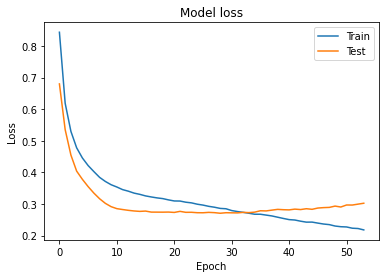

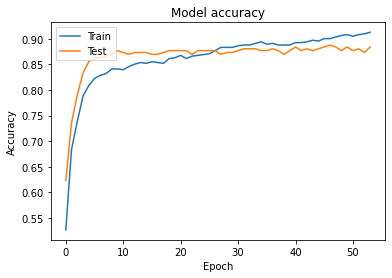

In [107]:
# Plot train vs test loss during training
plot_loss(train_model.history['loss'], train_model.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(train_model.history['accuracy'], train_model.history['val_accuracy'])

In [22]:
def plot_results(train_accs,test_accs):
  plt.plot(train_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(train_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('# of training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()


In [23]:
init_weigths = model.get_weights()
train_accs=[]
test_accs=[]
early_stopping_sizes = tf.keras.callbacks.EarlyStopping(monitor='loss', patience  =10)



In [24]:
train_sizes = [0.1,0.3,0.5]
for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, train_size = train_size)
    #Далее перед началом тренировку устанавливаем начальные веса 
    model.set_weights(init_weigths)
    #обучаем модель на новых данных
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stopping_sizes])
    #Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    




Epoch 1/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2553 - accuracy: 0.8594
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.8594
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2530 - accuracy: 0.8594
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2505 - accuracy: 0.8594
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.8594
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2411 - accuracy: 0.8594
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2371 - accuracy: 0.8594
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2311 - accuracy: 0.8594
Epoch 9/50
1/2 [==============>...............] - ETA: 0s - loss: 0.2179 - accuracy: 0.8750

2022-02-06 18:55:40.870541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step - loss: 0.2244 - accuracy: 0.8750
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.8750
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.8750
Epoch 12/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2084 - accuracy: 0.8750
Epoch 13/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2020 - accuracy: 0.8750
Epoch 14/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.8750
Epoch 15/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1910 - accuracy: 0.8750
Epoch 16/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1866 - accuracy: 0.8750
Epoch 17/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1814 - accuracy: 0.9062
Epoch 18/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1760 - accuracy: 0.9062
Epoch 19/50
2/2 [=========================

2022-02-06 18:55:41.666701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 5ms/step - loss: 0.2347 - accuracy: 0.8958
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2296 - accuracy: 0.8958
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.8958
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.9010
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9062
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9062
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2117 - accuracy: 0.9062
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.9010
Epoch 11/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.9115
Epoch 12/50
6/6 [==============================] - 0s 5ms/step - loss: 0.2031 - accuracy: 0.9115
Epoch 13/50
6/6 [==============================]

11/11 [==============================] - 0s 5ms/step - loss: 0.2024 - accuracy: 0.9315
Epoch 36/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.9283
Epoch 37/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 0.9315
Epoch 38/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9315
Epoch 39/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1996 - accuracy: 0.9315
Epoch 40/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1969 - accuracy: 0.9283
Epoch 41/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1973 - accuracy: 0.9377
Epoch 42/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1952 - accuracy: 0.9408
Epoch 43/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.9346
Epoch 44/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1968 - accuracy: 0.9346
Epoch 45/50
11/11 [===

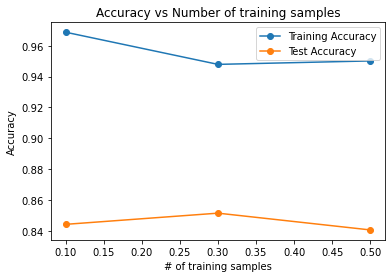

In [25]:
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

In [26]:
test_accs

[0.8442029356956482, 0.8514493107795715, 0.8405797481536865]